Gradient descent: You find the gradient vector (derivatives with respect to x and y) and move in the most negative direction. This works for finding local minima but if you want the global minima, well, you could get stuck. It's maximum tryhard so it never even considers going up; in fact it stops and returns as soon as it has to go up.

Conjugate descent: Imagine if gradient descent was lazier and only wanted to take the bare minimum number of steps to get its answer. I'll admit I don't fully understand the mathematics of it; I'm only a freshman in Calculus III, not a senior who's taken abstract algebra or something. It seems like the gist is to make an initial guess of a vector that you then iteratively transform to make more vectors with, using these to make increasingly accurate guesses as to what the b-variable is until you're within an acceptable tolerance. So it's not exact, but it seems like it's pretty good.

Quasi Newton: It sounds scary and super-complicated, but really it's basically like the gradient descent method except without the Jacobian. It just uses an approximation for the Jacobian/Hessian instead, so it can improve performance. (The Jacobian is a two-by-two matrix you get by doing partial derivatives of some equations, it's useful for when you're doing transformations on regions and such, but that's beside the point.) You only want to use these guys to find extrema of functions.

In [9]:
import numpy as np
def conjugate_gradient(A, b, x=None, max_iter=512, reltol=1e-2, verbose=False):
    """
    Implements conjugate gradient method to solve Ax=b for a large matrix A that is not
    computed explicitly, but given by the linear function A. 
    """
    if verbose:
        print("Starting conjugate gradient...")
    if x is None:
        x=np.zeros_like(b)
    #cg standard
    r=b-A(x)
    d=r
    rsnew=np.sum(r.conj()*r).real
    rs0=rsnew
    if verbose:
        print("initial residual: {}".format(rsnew))
    ii=0
    while ((ii<max_iter) and (rsnew>(reltol**2*rs0))):
        ii=ii+1
        Ad=A(d)
        alpha=rsnew/(np.sum(d.conj()*Ad))
        x=x+alpha*d
        if ii%50==0:
            #Every now and then compute exact residual to mitigate round-off errors
            r=b-A(x)
            d=r
        else:
            r=r-alpha*Ad
        rsold=rsnew
        rsnew=np.sum(r.conj()*r).real
        d=r+rsnew/rsold*d
        if verbose:
            print("{}, residual: {}".format(ii, rsnew))
    return x #Credit to researchsfinest.com, article named "Conjugate Gradient in Python"


diag = np.random.rand(10).astype(np.float32)

A_mat = np.diag(diag)

b = np.ones_like(diag)

def A(x):
    return A_mat.dot(x)

x = conjugate_gradient(A, b, reltol=1e-3, verbose=True)

# print Ax (=1)
print(A_mat.dot(x))

Starting conjugate gradient...
initial residual: 10.0
1, residual: 3.3235650062561035
2, residual: 3.040860176086426
3, residual: 2.5665993690490723
4, residual: 0.8144729733467102
5, residual: 0.4440646171569824
6, residual: 0.6477522253990173
7, residual: 0.07489199936389923
8, residual: 0.006848087068647146
9, residual: 0.00012036892439937219
10, residual: 1.84593869019306e-15
[0.99999994 0.99999994 0.99999994 1.         1.         1.0000001
 0.99999994 0.9999999  1.         1.        ]


In [38]:
from autograd import elementwise_grad as egrad
from autograd import jacobian
import autograd.numpy as np
from scipy import optimize


def func(x):
    return (x[0]**2/2) + (x[1]**2/3) - (x[0]*x[1]/4)


x_value = np.array([0.0, 0.0])  # note inputs have to be floats
H_f = jacobian(egrad(func))  # returns a function
#print(H_f(x_value))

Arr = [[0, 0], [0, 0]]

for i in range(2):
    for j in range(2):
        Arr[i][j] = 1/H_f(x_value)[i][j]

A = np.matrix([[Arr[0][0], Arr[0][1]], [Arr[1][0], Arr[1][1]]])
x = np.matrix([[1], [1]])
#print(Arr)

n = 100
for k in range(n):
    x = x - A * np.matrix([[1.0], [0.66]])

print(x)

#There did it oh my gosh I actually did that one on my own I feel like I have mastered arcane magic
#Wait it's wrong. oh well

[[165.]
 [302.]]


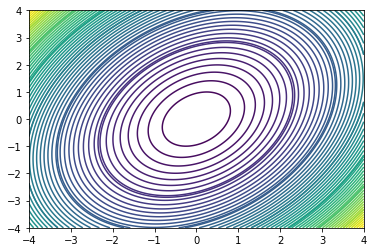

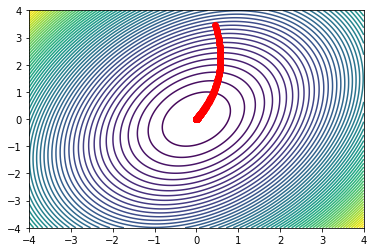

results of f_min:  9.968450337961864e-24   number of iterations:   1001
[0.44703612 3.47005706] 3.7258757589612923
[2.88621810e-12 5.39294784e-12] 9.968450337961864e-24


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

def f1(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)

# variable stepwidth
def derivative2(f, xy, d=0.001):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_fix(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f1, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f1(x_hist[0]))
print(x_hist[-1], f1(x_hist[-1]))

Ultimately, it seems like they're cl